# 타이타닉 데이터 EDA

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

가설 설정

목표 : 생존률과 관련 있는 요소 찾기

1. 객실 등급이 높으면 생존률이 높을것이다. (pcalss)
2. 여자이면서 아이인 사람의 생존률이 높을것이다. (sex, age)
3. 형제나 부부가 있는 사람의 생존률이 높을것이다. (sibsp)
4. 부모 혹은 자녀의 수가 많은 사람의 생존률이 높을것이다. (parch)
5. 지불한 금액이 높을수록 생존률이 높을것이다. (fare)

### 타이타닉 탑승자 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 폰트 사용하기 위한 코드

plt.rc('font', family='AppleGothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (13.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#확인
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks -  파이썬  실강/프로젝트오리엔테이션/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# 데이터를 잘 가져왔는지 확인

df.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [ ]:
df.info() # 데이터에 대한 전반적인 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


age, fare, cabin, embarked, boat, body, home.dest에 결측치가 존재하는 것을 확인했습니다.

In [ ]:
df.describe() # int, float 자료형에 대한 기초통계량 확인 / 필요시 object 데이터 변환 필요

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## 데이터전처리 과정

age 전처리

name column에서 정보를 얻어 유추한 후 전처리

- Mr: 미혼자, 기혼자 구분하지 않고 남성을 가리킬 때

- Mrs : 기혼자 여성

- Miss : 미혼자 여성

- Ms : 결혼의 유무를 밝히고 싶지 않은 사람들이 사용하는 호칭


> 1. 따라서 name에 Miss, Mrs가 들어간 사람들의 나이의 평균값을 추출한 후, 해당 값을 age 결측치에 넣어 처리하겠다. 

> 2. name이 Mr, Ms 의 age가 결측치인 경우 Mr, Ms의 평균값을 추출한 후 넣어주겠다.

> 3. 위 4가지에 해당이 되지 않는데 age가 결측치인 경우, age 결측치에 전체 age의 평균값을 넣어주겠다.

In [ ]:
# age 전처리는 name column에서 정보를 얻어 유추한 후 전처리
# str.contains() : pandas.Series 문자열 메서드


df['age'].isna().value_counts() # 결측치 개수 확인 : 263개


cond1= df['name'].str.contains('Mrs') # 기혼 여성

cond2 = df['name'].str.contains('Miss') # 미혼 여성

cond3 = df['name'].str.contains('Mr') # 구분하지 않는 남자

cond4 = df['name'].str.contains('Ms') # 결혼 유무를 밝히지 않은 여자


# 평균값 변수에 저장

Mrs_mean = df['age'][cond1].mean() # 기혼 여성의 평균값 : 약 36.80

Miss_mean = df['age'][cond2].mean() # 미혼 여성의 평균값 : 약 21.77

Mr_mean = df['age'][cond3].mean() # 구분하지 않고 남성의 평균값 : 약 33.32

Ms_mean = df['age'][cond4].mean() # 결혼 유무를 밝히지 않은 여자의 평균값 : 28

# 위 4가지에 해당하지 않는데 age가 결측치인 경우, age결측치에 전체 age의 평균값을 넣어주겠다.

(Mrs_mean + Miss_mean + Mr_mean + Ms_mean) / 4

29.975231435869368

In [ ]:
# index = 0
for index in range(len(df['age'])) :
    if (np.isnan(df.at[index, 'age'])) & ("Mrs" in df.at[index, 'name']) :
        df.at[index, 'age'] = Mrs_mean
    elif (np.isnan(df.at[index, 'age'])) & ("Miss" in df.at[index, 'name']) :
        df.at[index, 'age'] = Miss_mean
    elif (np.isnan(df.at[index, 'age'])) & ("Ms" in df.at[index, 'name']) :
        df.at[index, 'age'] = Ms_mean
    elif (np.isnan(df.at[index, 'age'])) & ('Mr' in df.at[index, 'name']) :
        df.at[index, 'age'] = Mr_mean
    elif np.isnan(df.at[index, 'age']) :
        df.at[index, 'age'] = df['age'].mean()

df['age'].isna().value_counts()

df.info()

df.iloc[15]

# df.at 계열은 한 개만 고르는 것이고, loc계열은 여러 개 슬라이스가 가능하다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


pclass                         1
survived                       0
name         Baumann, Mr. John D
sex                         male
age                     33.32209
sibsp                          0
parch                          0
ticket                  PC 17318
fare                      25.925
cabin                        NaN
embarked                       S
boat                         NaN
body                         NaN
home.dest           New York, NY
Name: 15, dtype: object

name 정보로 age 에 대한 결측치 정리하려다가 실패... -> 성공

(Mrs_mean + Miss_mean + Mr_mean + Ms_mean) / 4 = 29.92로

전체 age 값에 대한 평균인 29.77과 유사

여자 평균 나이와 남자 평균 나이로 나눠서 결측치를 처리하겠다

-> 그룹스터디에서 함께 생각해본 코드를 사용하여 name 정보로 age에 대한 결측치 처리됨

In [ ]:
# 위의 코드가 실행안되었을때 실행했던 코드

# cond1 = df['sex'] == 'female' # 여자 평균 28.68세
# cond2 = df['sex'] == 'male' # 남자 평균 30.58세

# df['age'][cond1] = df['age'][cond1].fillna(df['age'][cond1].mean())
# df['age'][cond2] = df['age'][cond2].fillna(df['age'][cond2].mean())

# df['age'].isna().value_counts()

# df.info() # 결측치 처리 확인

In [ ]:
# fare 전처리

df['fare'].isna().value_counts() # 결측치 갯수 확인 : 1개

df['fare'] = df['fare'].fillna(df['fare'].mean()) # 결측치가 한개니 null값에 평균값을 넣어줌

df['fare'].isna().value_counts()

df.info() # 결측치 처리 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# embarked 전처리

df['embarked'].isna().value_counts() # 결측치 갯수 확인 : 2개

df['embarked'].value_counts() # S 의 갯수가 914로 압도적으로 많은 것을 확인, 결측치를 S값으로 넣어주자

df['embarked'] = df['embarked'].fillna('S')

df['embarked'].isna().value_counts()

df.info() # 결측치 처리 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1309 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# cabin의 값 확인

df['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [ ]:
# boat 값 확인

df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [ ]:
# body 값 확인

df['body'].unique()

array([ nan, 135.,  22., 124., 148., 208., 172., 269.,  62., 133., 275.,
       147., 110., 307.,  38.,  80.,  45., 258., 126., 292., 175., 249.,
       230., 122., 263., 234., 189., 166., 207., 232.,  16., 109.,  96.,
        46., 245., 169., 174.,  97.,  18., 130.,  17., 295., 286., 236.,
       322., 297., 155., 305.,  19.,  75.,  35., 256., 149., 283., 165.,
       108., 121.,  52., 209., 271.,  43.,  15., 101., 287.,  81., 294.,
       293., 190.,  72., 103.,  79., 259., 260., 142., 299., 171.,   9.,
       197.,  51., 187.,  68.,  47.,  98., 188.,  69., 306., 120., 143.,
       156., 285.,  37.,  58.,  70., 196., 153.,  61.,  53., 201., 309.,
       181., 173.,  89.,   4., 206., 327., 119.,   7.,  32.,  67., 284.,
       261., 176.,  50.,   1., 255., 298., 314.,  14., 131., 312., 328.,
       304.])

In [ ]:
# home 값 확인

df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

cabin(객실정보), boat(탈출한 보트가 있다면 boat번호), body(사망자의 시신 수습 후 부여한 일련번호), home(출신) 은 생존률과 관련이 없다고 판단하여 해당 데이터프레임에서 제외시키겠습니다.


In [ ]:
# cabin, boat, body, home.dest columns 를 기준으로 

df = df.drop(df[['cabin', 'boat', 'body', 'home.dest']], axis=1)

In [ ]:
# column이 삭제됨을 확인
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,21.774238,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.000000,0,0,315082,7.8750,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


기본적인 데이터 전처리를 했습니다.

In [ ]:
# 상관계수 확인
df.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.365888,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.072744,-0.027825,0.082660,0.244208
age,-0.365888,-0.072744,1.000000,-0.208285,-0.133390,0.165741
sibsp,0.060832,-0.027825,-0.208285,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.133390,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.165741,0.160224,0.221522,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


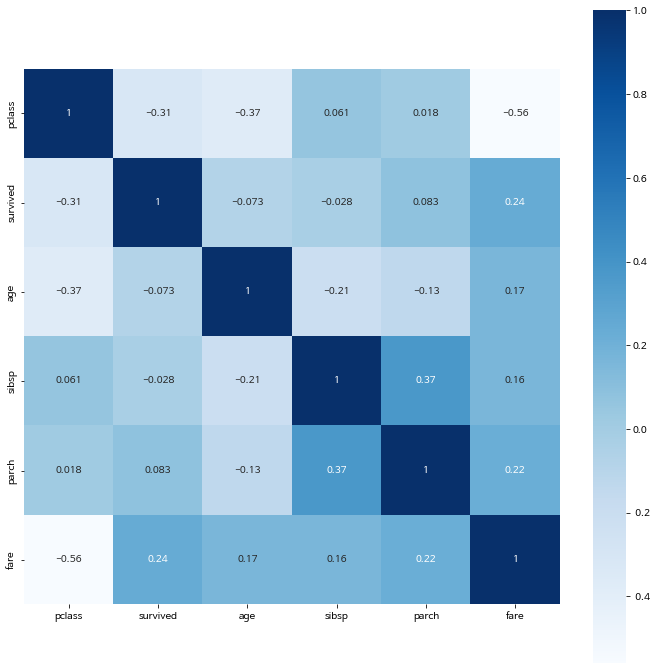

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), square=True, annot=True, cmap='Blues')
plt.show()

<Figure size 432x288 with 0 Axes>

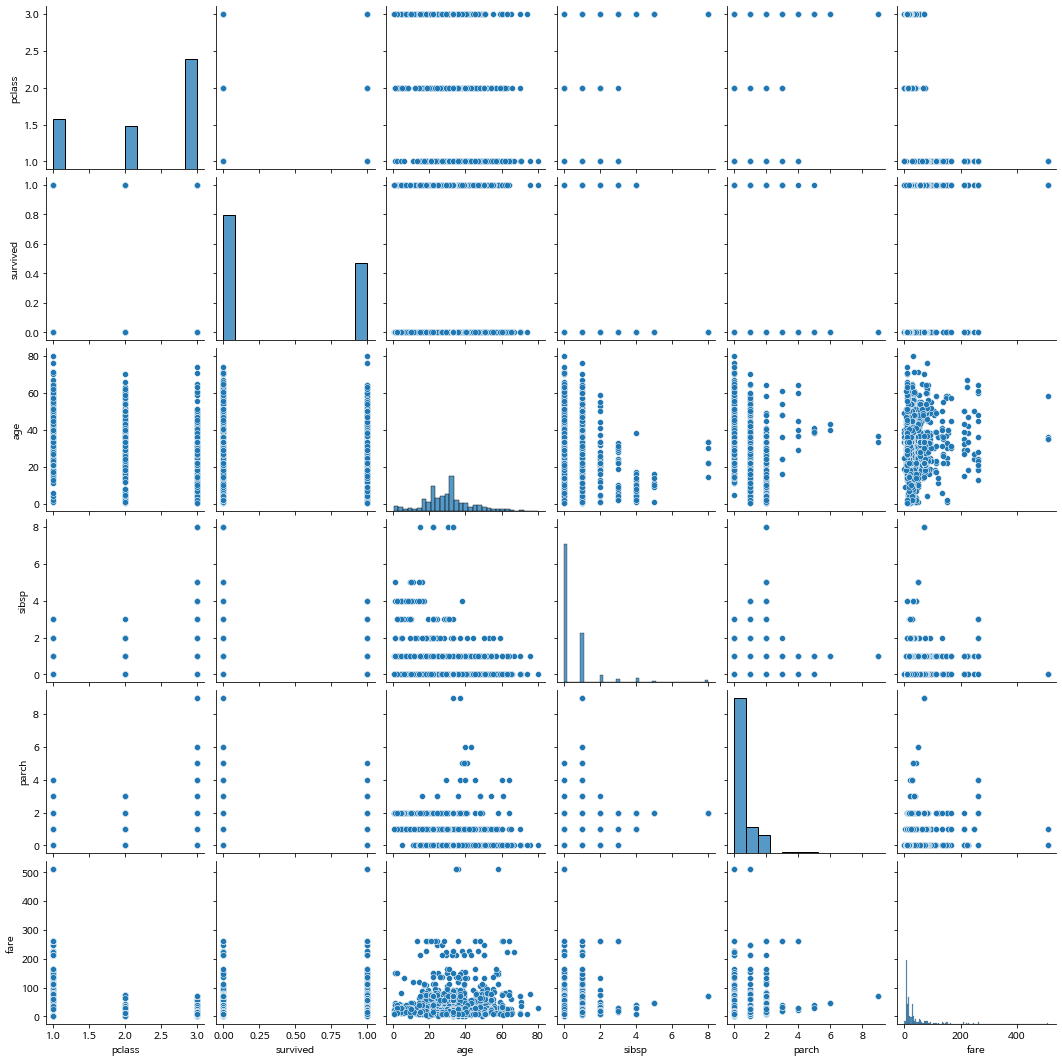

In [ ]:
plt.figure()
sns.pairplot(df)
plt.show()

## 1. 객실 등급(pclass)
- 객실 등급이 높으면 생존률이 높을것이다.
- 객실 등급이 높고 여성일수록 생존률이 높을것이다.
- 높은 객실 등급을 이용하는 연령층은 중년일 것이다.


### '객실 등급이 높으면 생존률이 높을것이다.' 가설 확인

In [ ]:
how = {
    'survived' : np.mean
}

df.groupby('pclass').agg(how)

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [ ]:
len(df[df['pclass'] == 1]) # 1등석 승객 수

df.loc[df['pclass'] == 1, 'survived'].sum() # 1등석 승객 중 생존승객 수

df.loc[df['pclass'] == 1, 'survived'].sum() / len(df[df['pclass'] == 1]) # 생존률 61% 확인

0.6191950464396285

In [ ]:
len(df[df['pclass'] == 2]) # 2등석 승객 수

df.loc[df['pclass'] == 2, 'survived'].sum() # 2등석 승객 중 생존승객 수

df.loc[df['pclass'] == 2, 'survived'].sum() / len(df[df['pclass'] == 2]) # 생존률 42% 확인

0.4296028880866426

In [ ]:
len(df[df['pclass'] == 3]) # 3등석 승객 수

df.loc[df['pclass'] == 3, 'survived'].sum() # 3등석 승객 중 생존승객 수

df.loc[df['pclass'] == 3, 'survived'].sum() / len(df[df['pclass'] == 3]) # 생존률 25% 확인

0.2552891396332863

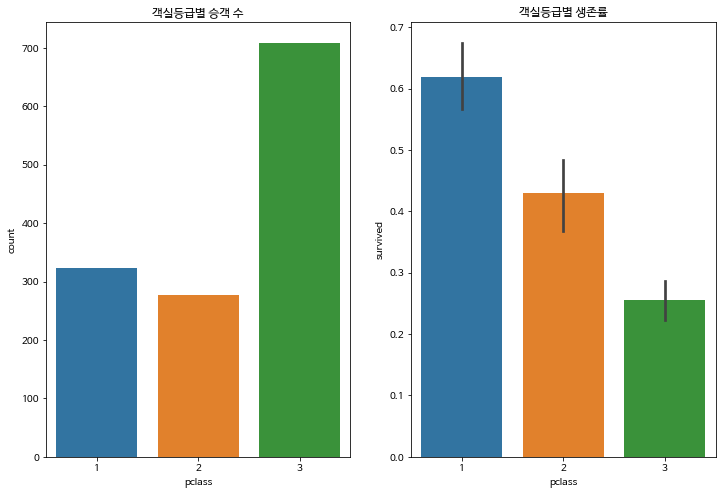

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='pclass')
plt.title('객실등급별 승객 수')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='pclass', y='survived')
plt.title('객실등급별 생존률')

plt.show()

위의 결과를 보아, 3등급의 승객수가 많고, 객실 등급이 높을수록 생존률이 높다는 사실이 확인되었다.


### '객실 등급이 높고 여성일수록 생존률이 높을것이다.' 가설 확인

In [ ]:
df.groupby(['pclass', 'sex']).agg(how)

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

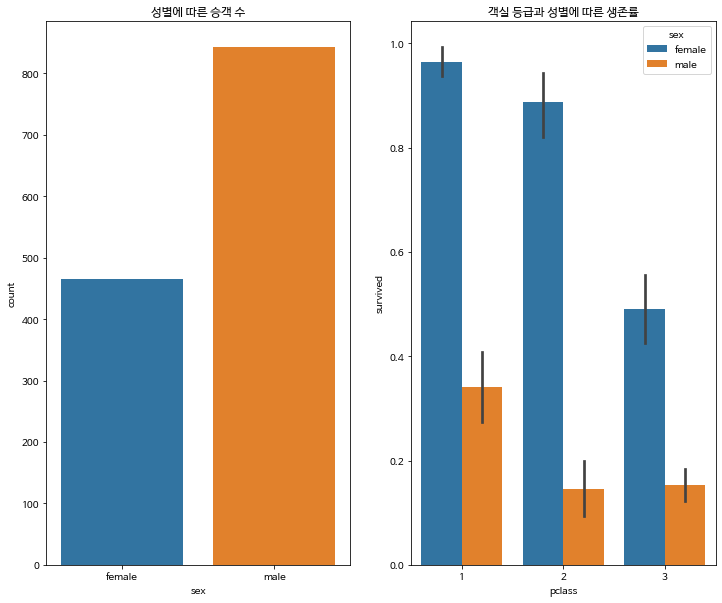

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
sns.countplot(data=df, x='sex')
plt.title('성별에 따른 승객 수')

plt.subplot(1,2,2)
sns.barplot(data=df, x='pclass', y='survived', hue='sex')
plt.title('객실 등급과 성별에 따른 생존률')

plt.show()

전체 승객의 성별비율은 남자가 2배정도 많으나, 객실등급이 높고 여자인 경우의 생존률은 남자보다 높았다.

### '높은 객실 등급을 이용하는 연령층은 중년일 것이다.' 가설 확인

- 중년층의 경제적인 부분이 청소년, 청년층보다 여유로울 것으로 예상하여 해당 가설을 생각했습니다.

Text(0.5, 1.0, '연령대 분포')

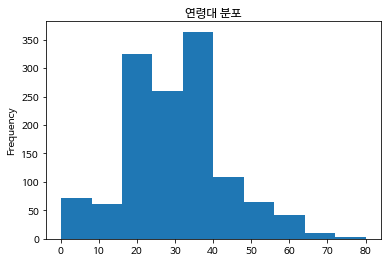

In [ ]:
df['age'].plot.hist()
plt.title('연령대 분포')

# 전반적으로 20~40대 연령층이 많이 분포해있는 것을 확인
# 연령대마다 객실 등급을 나눠서 확인해보자

In [ ]:
df.age.describe()

count    1309.000000
mean       30.176862
std        13.076204
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [ ]:
# map() : 특정 열의 값을 임의 값으로 변경할 수 있는 함수

# 연령층을 나타내는 column 값을 만들어서 dataframe column 끝에 삽입

def func_age(x) :
    if 0 < x <= 20 :
        return '청소년(~20세)'
    elif 20 < x <= 40 :
        return '청년(21~40세)'
    elif 40 < x <= 60 :
        return '중년(41~60세)'
    else :
        return '노인(61세~)'

df['연령층'] = df['age'].map(func_age) # 새로운 컬럼명
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,연령층
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,청년(21~40세)
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,청소년(~20세)
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,청소년(~20세)
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,청년(21~40세)
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,청년(21~40세)


In [ ]:
df.groupby(['pclass','연령층']).agg(how)

survived
pclass 연령층                 
1      노인(61세~)    0.285714
       중년(41~60세)  0.583333
       청년(21~40세)  0.654762
       청소년(~20세)   0.807692
2      노인(61세~)    0.166667
       중년(41~60세)  0.318182
       청년(21~40세)  0.377907
       청소년(~20세)   0.709091
3      노인(61세~)    0.166667
       중년(41~60세)  0.119048
       청년(21~40세)  0.244939
       청소년(~20세)   0.323353

In [ ]:
a = df['연령층'].value_counts().index
b = df['연령층'].value_counts().values

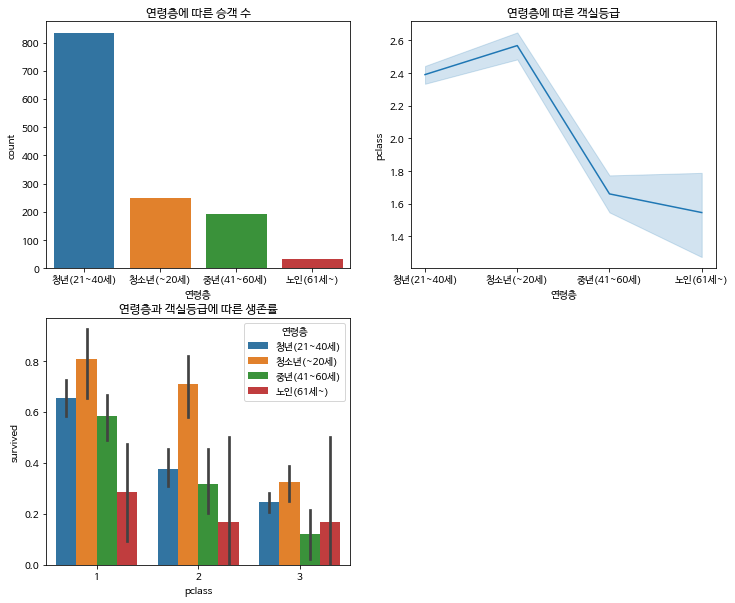

In [ ]:
# 질문 : xlabel순서를 청소년,청년,중년,노인순으로 정리


plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(data=df, x='연령층')
plt.title('연령층에 따른 승객 수')

plt.subplot(2,2,2)
sns.lineplot(data=df, x='연령층', y='pclass')
plt.title('연령층에 따른 객실등급')

plt.subplot(2,2,3)
sns.barplot(data=df, x='pclass', y='survived', hue='연령층')
plt.title('연령층과 객실등급에 따른 생존률')



plt.show()

승객의 대부분은 청소년, 청년층이다.

청년, 청소년은 2,3 등급을 주로 이용하였고, 

중년, 노인은 1,2 등급을 주로 이용하였다는 것을 확인했습니다.

전반적으로 객실 등급이 높을수록 그리고 청년, 청소년인 연령대의 생존률이 높았고,


객실 등급이 1등급이고 중년인 생존률은 상대적으로 높고, 2등급, 3등급의 중년 생존률은 낮음을 확인하였습니다.

또한, 노인의 생존률은 객실 등급과 상관없이 비교적 낮은 생존률을 나타내는 것을 확인했습니다.

## 2. 성별, 나이
- 여자이면서 아이인 사람의 생존률은 높을 것이다.
- 여자이면서 노인인 사람의 생존률은 높을 것이다.

In [ ]:
df.groupby('sex').agg(how)

,survived
sex,
female,0.727468
male,0.190985


In [ ]:
df.groupby(['sex','연령층']).agg(how)

survived
sex    연령층                 
female 노인(61세~)    0.857143
       중년(41~60세)  0.830986
       청년(21~40세)  0.713262
       청소년(~20세)   0.688073
male   노인(61세~)    0.076923
       중년(41~60세)  0.186992
       청년(21~40세)  0.174775
       청소년(~20세)   0.280576

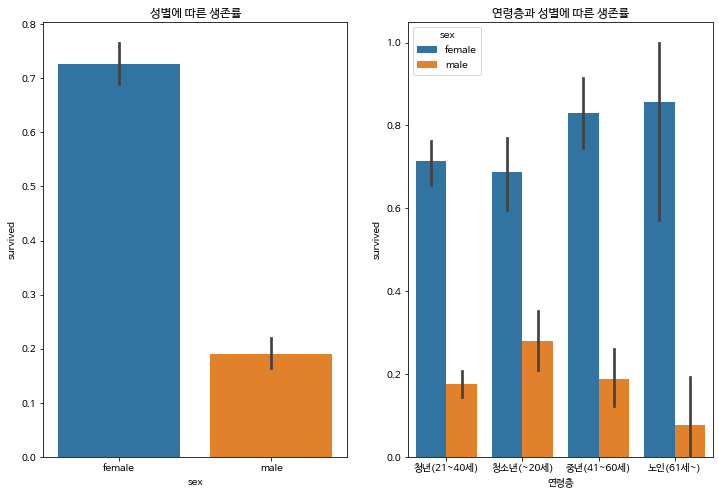

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(data=df, x = 'sex', y='survived')
plt.title('성별에 따른 생존률')

plt.subplot(1,2,2)
sns.barplot(data=df, x = '연령층', y='survived', hue='sex')
plt.title('연령층과 성별에 따른 생존률')

plt.show()

연령대와 상관없이 여성의 생존률이 압도적으로 높은 것을 확인하였다.

## 3. 형제 혹은 부부의 수, 부모 혹은 자녀의 수
- 형제 혹은 부부의 수가 많은 사람의 생존률이 높을것이다.
- 부모 혹은 자녀의 수가 많은 사람의 생존률이 높을것이다.
- 둘 다 있다면 생존률이 높을것이다.

sibsp(형제 혹은 부부의 수)

Text(0.5, 1.0, '형제 혹은 부부의 수 분포')

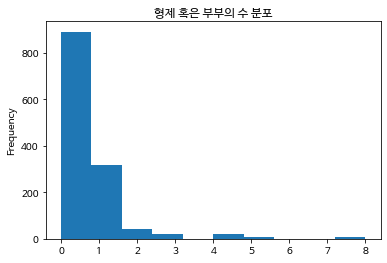

In [ ]:
df['sibsp'].plot.hist()
plt.title('형제 혹은 부부의 수 분포')

# 0인 값은 제외하겠다.

Text(0.5, 1.0, '형제,부부의 수가 1이상의 분포')

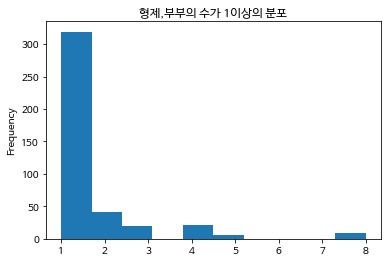

In [ ]:
cond3 = df['sibsp'] >= 1
df.loc[cond3,'sibsp'].plot.hist()
plt.title('형제,부부의 수가 1이상의 분포')

In [ ]:
df.sibsp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

In [ ]:
def func_si(x) :
    if x == 0 :
        return '없음'
    elif x == 1 :
        return '보통'
    else :
        return '많음'

df['보호자'] = df['sibsp'].map(func_si)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,연령층,보호자
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,청년(21~40세),없음
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,청소년(~20세),보통
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,청소년(~20세),보통
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,청년(21~40세),보통
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,청년(21~40세),보통


In [ ]:
df.groupby('보호자').agg(how)

,survived
보호자,
많음,0.282828
보통,0.510972
없음,0.346801


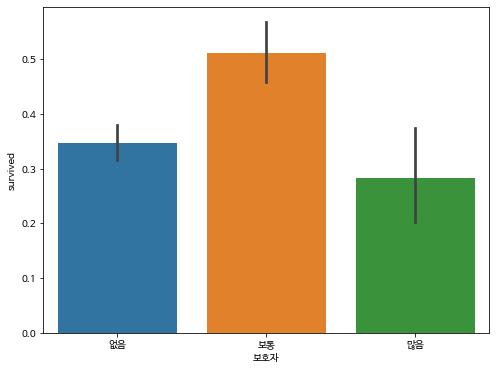

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='보호자', y='survived')
plt.show()

형제 혹은 부부의 수가 보통(1명)인 경우의 생존률이 가장 높았다.

parch(부모 혹은 자녀의 수)

Text(0.5, 1.0, '부모 혹은 자녀의 수 분포')

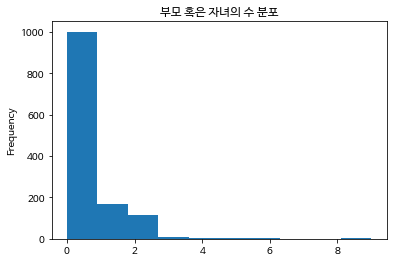

In [ ]:
df['parch'].plot.hist()
plt.title('부모 혹은 자녀의 수 분포')

Text(0.5, 1.0, '부모, 자식의 수가 8미만의 분포')

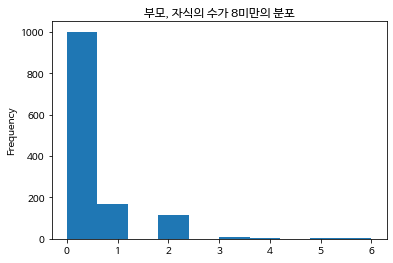

In [ ]:
# 8명 미만의 분포 확인

df.loc[df['parch'] < 8,'parch'].plot.hist()
plt.title('부모, 자식의 수가 8미만의 분포')

In [ ]:
df.parch.describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

In [ ]:
def func_pa(x) :
    if x == 0 :
        return '없음'
    elif x == 1 :
        return '보통'
    else :
        return '많음'

df['직계가족'] = df['parch'].map(func_pa)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,연령층,보호자,직계가족
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,청년(21~40세),없음,없음
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,청소년(~20세),보통,많음
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,청소년(~20세),보통,많음
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,청년(21~40세),보통,많음
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,청년(21~40세),보통,많음


In [ ]:
df.groupby('직계가족').agg(how)

,survived
직계가족,
많음,0.467153
보통,0.588235
없음,0.335329


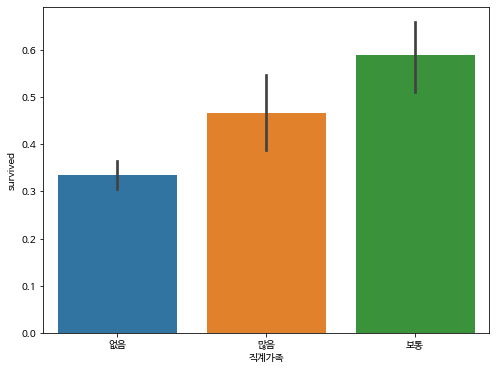

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='직계가족', y='survived')
plt.show()

부모 혹은 자녀의 수가 보통(1명)인 경우의 생존률이 가장 높았다.

In [ ]:
df.groupby(['보호자', '직계가족']).agg(how)

survived
보호자 직계가족          
많음  많음    0.238095
    보통    0.321429
    없음    0.310345
보통  많음    0.478261
    보통    0.588889
    없음    0.480874
없음  많음    0.653061
    보통    0.730769
    없음    0.302532

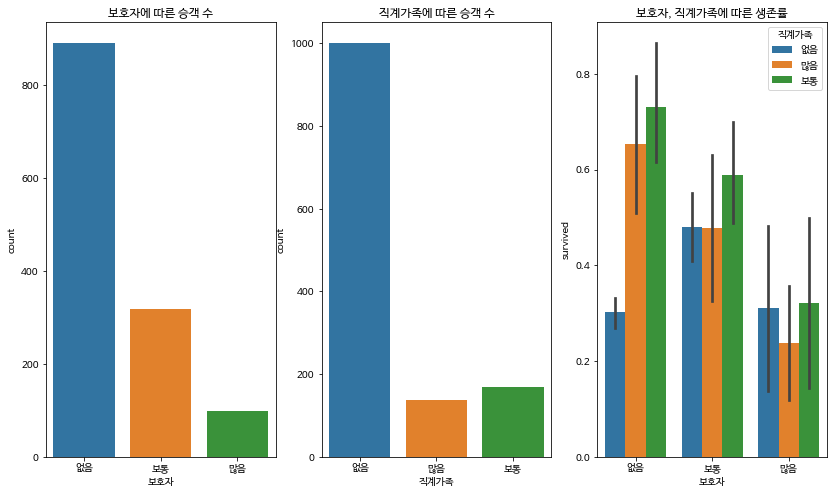

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.countplot(data=df, x='보호자')
plt.title('보호자에 따른 승객 수')

plt.subplot(1,3,2)
sns.countplot(data=df, x='직계가족')
plt.title('직계가족에 따른 승객 수')


plt.subplot(1,3,3)
sns.barplot(data=df, x='보호자', y='survived', hue = '직계가족')
plt.title('보호자, 직계가족에 따른 생존률')

plt.show()

보호자가 없는데 직계가족이 보통(1명)인 경우의 생존률이 가장 높다.

보호자가 많을수록, 직계가족이 많을수록 생존률이 낮다.

추측
- 본인이 없어도 남은 가족들끼리 서로 돌봐줄수 있는 환경에 처한 사람의 생존률이 낮은 것을 확인할 수 있다.

- 반면, 본인이 죽을경우에 남겨진 가족이 서로 의지할 수 있는 환경이 아닌 경우, 생존률은 높다고 할 수 있다.


## 4. 지불한 금액에 따른 생존률
- 지불한 금액이 높을수록 생존률이 높을것이다.
- 중년층일수록 지불한 금액이 높을것이다.
-> 중년층이고 지불한 금액이 높은 사람의 생존률을 구해보자

Text(0.5, 1.0, '지불 금액 분포')

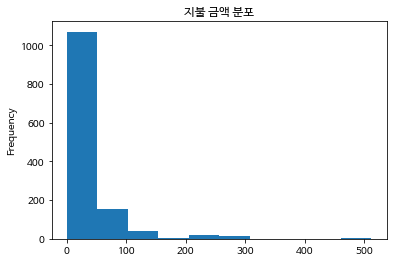

In [ ]:
df['fare'].plot.hist()
plt.title('지불 금액 분포')

In [ ]:
df.fare.describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

Text(0.5, 1.0, '지불금액이 100 이상인 분포')

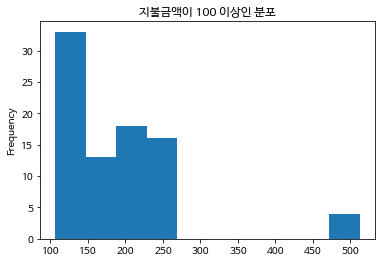

In [ ]:
# 100 이상을 지불한 데이터 분포만 확인
df.loc[df['fare'] >= 100, 'fare'].plot.hist()
plt.title('지불금액이 100 이상인 분포')

In [ ]:
df.loc[df['fare'] < 100, 'fare'].describe()

count    1225.000000
mean       22.298567
std        20.637825
min         0.000000
25%         7.895800
50%        13.000000
75%        27.720800
max        93.500000
Name: fare, dtype: float64

In [ ]:
def func_fa(x) :
    if 0 < x < 10 :
        return '매우저렴'
    elif x < 20 :
        return '저렴'
    elif x < 30 :
        return '보통'
    elif x < 100 :
        return '비쌈'
    else :
        return '매우비쌈'

df['지불금액'] = df['fare'].map(func_fa)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,연령층,보호자,직계가족,지불금액
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,청년(21~40세),없음,없음,매우비쌈
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,청소년(~20세),보통,많음,매우비쌈
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,청소년(~20세),보통,많음,매우비쌈
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,청년(21~40세),보통,많음,매우비쌈
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,청년(21~40세),보통,많음,매우비쌈


In [ ]:
df.groupby('지불금액').agg(how)

,survived
지불금액,
매우비쌈,0.714286
매우저렴,0.227848
보통,0.432039
비쌈,0.531835
저렴,0.363309


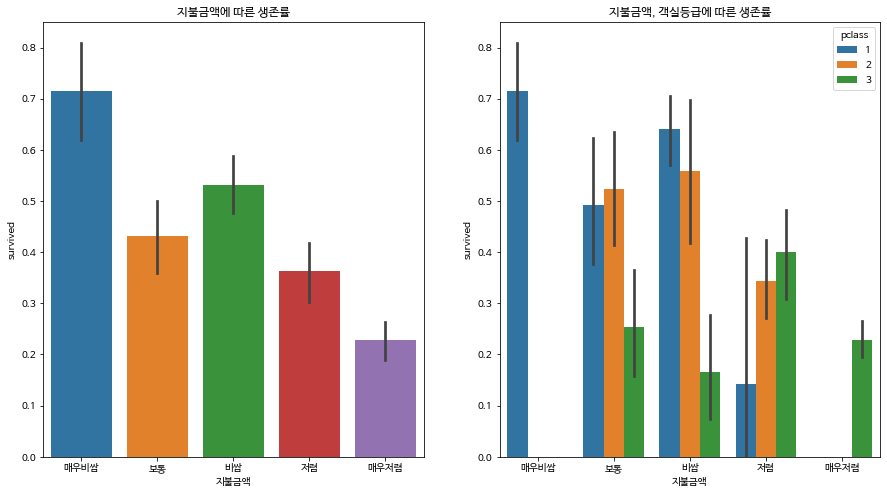

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.barplot(data=df, x='지불금액', y='survived')
plt.title('지불금액에 따른 생존률')

plt.subplot(1,2,2)
sns.barplot(data=df, x='지불금액', y='survived', hue='pclass')
plt.title('지불금액, 객실등급에 따른 생존률')

plt.show()

지불금액이 비쌀수록 생존률이 높다

지불금액이 비싼정도에 따라 객실등급도 좋아진다.
지불금액이 비싸고 객실등급도 높으면 생존률이 높다.

## 데이터 전처리 후 생존률과 관련된 column에 따라 가설을 확인하였고,  지금부터는 하다가 궁금했던 것을 해보겠습니다.

#### 1. 연령대가 중년이고 객실등급이 높을수록 지불금액이 클까?

- 연령대와 객실등급별 지불금액이 궁금!

In [ ]:
how_fa = {
    'fare' : np.mean
}

df.groupby(['pclass', '연령층']).agg(how_fa)

fare
pclass 연령층                   
1      노인(61세~)     86.157543
       중년(41~60세)   79.935032
       청년(21~40세)   88.256944
       청소년(~20세)   115.228685
2      노인(61세~)     13.256250
       중년(41~60세)   21.424336
       청년(21~40세)   19.551356
       청소년(~20세)    26.938107
3      노인(61세~)     12.065913
       중년(41~60세)   11.961707
       청년(21~40세)   12.462051
       청소년(~20세)    16.291618

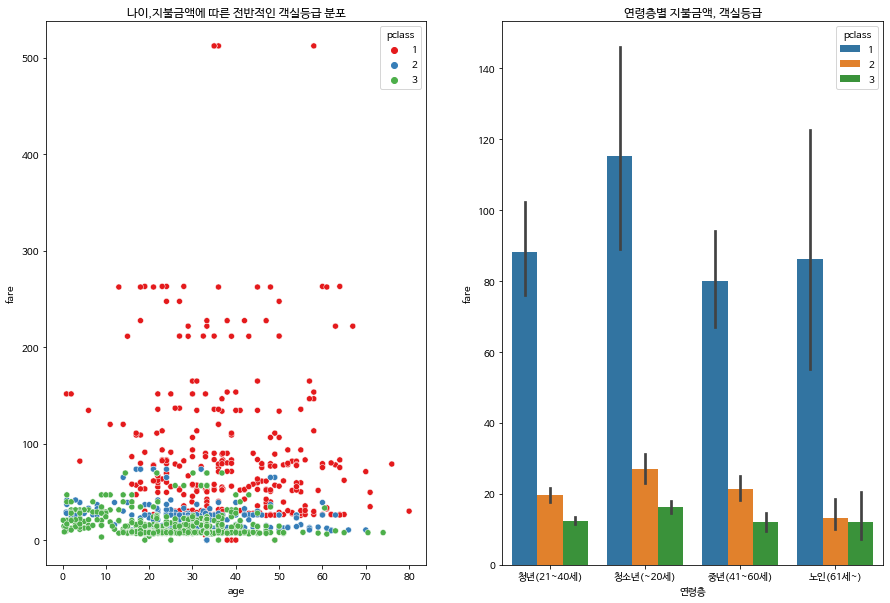

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='age', y='fare', hue='pclass',palette='Set1' )
plt.title('나이,지불금액에 따른 전반적인 객실등급 분포')

plt.subplot(1,2,2)
sns.barplot(data=df, x='연령층', y='fare', hue='pclass')
plt.title('연령층별 지불금액, 객실등급')

plt.show()

중년의 지불금액이 클것이라고 예상했는데, 각 연령층 중 청소년의 지불금액 평균금액이 가장 큰 것을 확인하였다.

추측
- 청소년이 일찍 사회적인 활동을 통해 번 소득으로 경제적인 여유를 얻었다기보단 부모님의 지원으로 인한 결과가 아닐까?

#### 2. 형제, 부부의 수나 부모, 자녀의 수가 클수록 지불금액이 클까?
- *가족* 수가 많을수록 경제적 여유가 있는걸까?

In [ ]:
how_fare = {
    'fare' :np.mean
}

df.groupby(['보호자', '직계가족']).agg(how_fare)

fare
보호자 직계가족           
많음  많음    78.784821
    보통    28.161757
    없음    33.278597
보통  많음    74.090039
    보통    43.427498
    없음    44.930536
없음  많음    40.079843
    보통    73.390710
    없음    21.774782

In [ ]:
df.fare >= 300

df.loc[df.fare >= 300,'fare']

# fare가 300인 값은 4개로 해당 범위에서 제외하였습니다.

49     512.3292
50     512.3292
183    512.3292
302    512.3292
Name: fare, dtype: float64

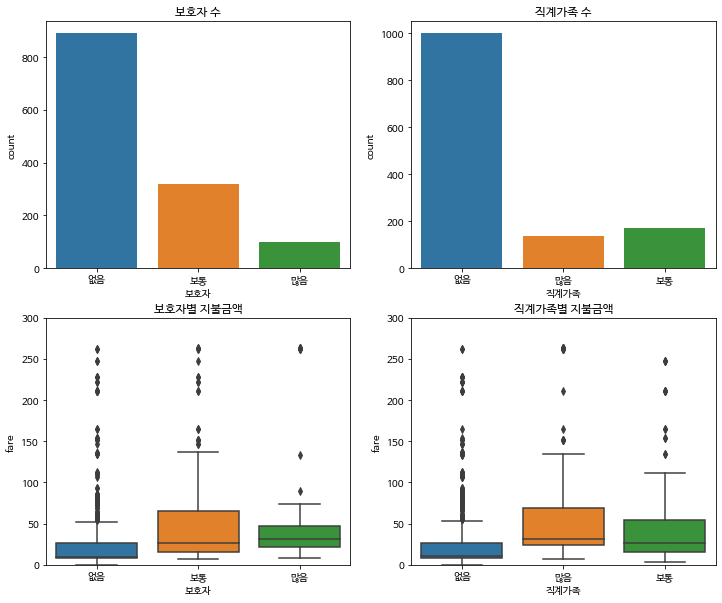

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(data=df, x='보호자')
plt.title('보호자 수')

plt.subplot(2,2,2)
sns.countplot(data=df, x='직계가족')
plt.title('직계가족 수')

plt.subplot(2,2,3)
sns.boxplot(data=df, x='보호자', y='fare')
plt.ylim([0,300]) # 위 코드에서 확인한 4개의 이상치에 대한 범위를 제외한 나머지 fare 범위 설정
plt.title('보호자별 지불금액')

plt.subplot(2,2,4)
sns.boxplot(data=df, x='직계가족', y='fare')
plt.ylim([0,300])
plt.title('직계가족별 지불금액')


plt.show()

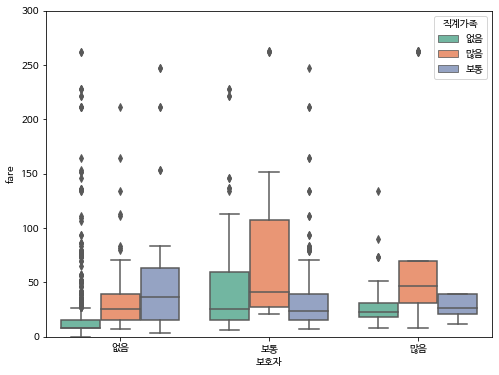

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='보호자', y='fare', hue='직계가족', palette='Set2')
plt.ylim([0,300]) # 위 코드에서 확인한 4개의 이상치에 대한 범위를 제외한 나머지 fare 범위 설정
plt.show()

보호자가 보통이고 직계가족이 많은 경우의 지불금액이 가장 높고, 보호자, 직계가족이 없는 경우의 지불금액이 가장 낮았습니다.

추측
- 보호자, 직계가족이 없는 경우는 1인 가구라고 판단, 당시의 1인 가구의 소득이 적었다는 것을 추측할 수 있습니다.
- 보호자가 1명 이상이고 직계가족이 많을수록 지불금액이 높은것을 보아, 가족이 많을수록 경제적인 여유가 있다고 판단할 수 있습니다.